# This notebook corresponds with the VAIL Day 24 Activity

# MODEL CREDIT: https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer

# Affective Computing Applications:
* At its core, affective computing is the application of AI/ML for the analysis of human emotions. This AI model has very
obvious affective computing applications. The ability of this model to detect emotions from short audio clips can be
used by companies to determine if recorded consumer interactions were positive/negative. The company could then
adjust their current strategies for handling consumer interactions (to either bolster positive interactions or reduce negative
interactions).

In [1]:
#making imports & loading model:

from keras.models import load_model
model = load_model('Emotion_Voice_Detection_Model.h5')

In [10]:
#taking recording of my voice
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output10.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


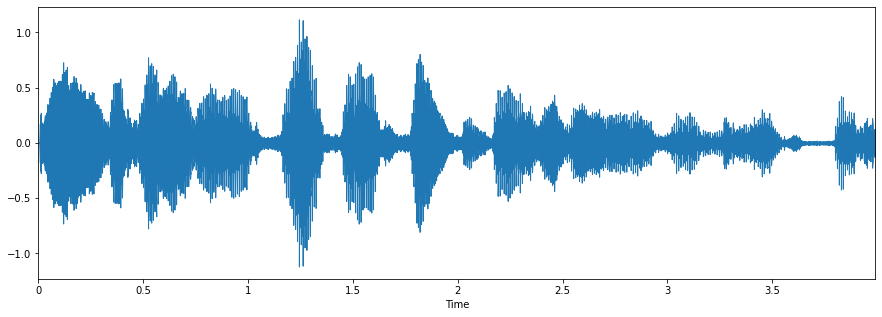

In [12]:
#now that we have an audio recording, using the librosa library to process data & feed into model:

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#visualizing my angry audio recording

data, sampling_rate = librosa.load('/Users/jonathan.williams/Desktop/Desktop-s-will511/VAIL_AI/VAIL_AI_Code/Week4/output10.wav')

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [13]:
angry_data,sample_rate = librosa.load('/Users/jonathan.williams/Desktop/Desktop-s-will511/VAIL_AI/VAIL_AI_Code/Week4/output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=angry_data, sr=sample_rate, n_mfcc=13),
                        axis=0)
angry_data_features = mfccs

In [14]:
#printing model summary:
model.summary()
#feeding our model prediction into the optimized CNN model
angry_data_features = np.atleast_2d(angry_data_features)
angry_data_features = np.expand_dims(angry_data_features,axis=2)
angry_predict = model.predict(angry_data_features)

print(np.argmax(angry_predict,axis=1))

"""
Model Prediction Key for Hot Encoded Emotion Labels:
0 - female_angry
1 - female_calm
2 - female_fearful
3 - female_happy
4 - female_sad
5 - male_angry
6 - male_calm
7 - male_fearful
8 - male_happy
9 - male_sad
"""

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 216, 128)          768       
_________________________________________________________________
activation_8 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 216, 128)          82048     
_________________________________________________________________
activation_9 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 27, 128)           8

'\nModel Prediction Key for Hot Encoded Emotion Labels:\n0 - female_angry\n1 - female_calm\n2 - female_fearful\n3 - female_happy\n4 - female_sad\n5 - male_angry\n6 - male_calm\n7 - male_fearful\n8 - male_happy\n9 - male_sad\n'

# Conclusions:

* This emotion classifier CNN was able to accurately detect the emotion & gender of my recoreding (male+angry)
* This is an exciting application of ML!